# Latent Dirichlet Allocation

## Data

In [83]:
import pandas as pd
import datetime as datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go


In [7]:
sep = pd.read_csv('./datasets/sep_combi_final_preprocessed.csv', usecols = ['num_comments', 'score', 'link_flair_text', 'post', 'covid_onset', 
       'stop_lem_lower_cleaned'] ,low_memory=False)
sep.shape

(205594, 6)

In [8]:
# sep_no = sep[sep['covid_onset'] == 'no']

In [9]:
# sep_yes = sep[sep['covid_onset'] == 'yes']

In [10]:
cv = CountVectorizer(max_df=0.97, min_df=2, stop_words='english')

In [11]:
# dtm = cv.fit_transform(sep_sub['stop_cleaned'])
# dtm = cv.fit_transform(sep_sub['stop_lem_lower_cleaned'].values.astype('U'))  ## Even astype(str) would work
dtm = cv.fit_transform(sep['stop_lem_lower_cleaned'].values.astype('U'))

In [12]:
dtm

<205594x25895 sparse matrix of type '<class 'numpy.int64'>'
	with 2651485 stored elements in Compressed Sparse Row format>

## LDA

In [13]:
LDA = LatentDirichletAllocation(n_components=7,random_state=42)

In [14]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

## Showing Stored Words

### Showing Top Words Per Topic

In [15]:
single_topic = LDA.components_[0]

In [16]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([11020, 18309,   539, 25716, 12942, 19858,  5393, 23104, 23098,
       20050])

In [17]:
top_word_indices = single_topic.argsort()[-10:]

In [53]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['heart', 'purchase', '20', 'year', 'know', 'rouge', 'code', 'thanks', 'thank', 'sale']


THE TOP 15 WORDS FOR TOPIC #1
['face', 'using', 'moisturizer', 'serum', 'love', 'mask', 'cream', 'product', 'like', 'skin']


THE TOP 15 WORDS FOR TOPIC #2
['tear', 'size', 'perfume', 'lol', 'smell', 'palette', 'smiling', 'love', 'like', 'face']


THE TOP 15 WORDS FOR TOPIC #3
['week', 'year', 'item', 'shipping', 'stock', 'reward', 'time', 'sample', 'day', 'order']


THE TOP 15 WORDS FOR TOPIC #4
['100', 'dry', 'oil', 'love', 'conditioner', 'shampoo', 'product', 'like', 'point', 'hair']


THE TOP 15 WORDS FOR TOPIC #5
['eye', 'beauty', 'look', 'blush', 'powder', 'love', 'shade', 'like', 'foundation', 'lip']


THE TOP 15 WORDS FOR TOPIC #6
['review', 'work', 'time', 'customer', 'know', 'like', 'return', 'people', 'product', 'store']




## 7 topics gave the best defined - 
1. 'makeup',
2. 'customer service',
3. 'purchases',
4. 'shipping',
5. 'fragrance',
6. 'skincare',
7. 'haircare'

### Attaching Discovered Topic Labels to Original Articles

In [19]:
topic_results = LDA.transform(dtm)

In [20]:
topic_results.shape

(205594, 7)

In [21]:
topic_results[0].round(2)

array([0.07, 0.07, 0.07, 0.07, 0.07, 0.57, 0.07])

### Combining with Original Data

In [105]:
sep['combi_topic'] = topic_results.argmax(axis=1)

In [ ]:
sep['topics']

In [ ]:
def topic_naming(x):
    if x>0.6:
        return 1
    else: return 0

In [106]:
sep.head(10)

,num_comments,score,link_flair_text,post,covid_onset,stop_lem_lower_cleaned,combi_topic,topics,combi_topics
0,0,1,NaN,submission,no,anyone ever lipstick,5,5,5
1,1,1,NaN,submission,no,are gift set worth getting holiday season,0,0,0
2,1,1,NaN,submission,no,free 2014 make up for ever birthday set with a...,0,0,0
3,0,1,NaN,submission,no,in gift box review gift card,0,0,0
4,2,2,NaN,submission,no,vib rouge worth do new vib rouge member welcom...,0,0,0
5,0,2,NaN,submission,no,sephora collection contour stick,5,5,5
6,0,1,NaN,submission,no,thing people who work do tell,6,6,6
7,0,2,NaN,submission,no,do forget tomorrow one epic reward,0,0,0
8,0,0,NaN,submission,no,going tomorrow wait,3,3,3
9,0,0,NaN,submission,no,150 gift card giveaway event,3,3,3


In [34]:
topic = sep.groupby(['topics']).size().reset_index(name='counts').sort_values(by='counts') 
topic

,topics,counts
4,4,16825
3,3,26100
6,6,30806
5,5,31114
1,1,31120
2,2,32904
0,0,36725


In [60]:
topic_count = sep.groupby(['topics','covid_onset']).size().reset_index(name='counts')
topic_count

,topics,covid_onset,counts
0,0,no,8838
1,0,yes,27887
2,1,no,5106
3,1,yes,26014
4,2,no,5029
5,2,yes,27875
6,3,no,8209
7,3,yes,17891
8,4,no,2973
9,4,yes,13852


In [61]:
topic_count['topics'][0] = 'purchases'

/var/folders/hp/k01r_fgx3cz1n6vpjnnmmc7m0000gn/T/ipykernel_5920/2502790475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_count['topics'][0] = 'purchases'


In [62]:
topic_count['topics'][1] = 'purchases'

In [63]:
topic_count['topics'][2] = 'skincare'

In [64]:
topic_count['topics'][3] = 'skincare'

In [65]:
topic_count['topics'][4] = 'fragrance'

In [66]:
topic_count['topics'][5] = 'fragrance'

In [67]:
topic_count['topics'][6] = 'shipping'

In [68]:
topic_count['topics'][7] = 'shipping'

In [69]:
topic_count['topics'][8] = 'haircare'

In [70]:
topic_count['topics'][9] = 'haircare'

In [71]:
topic_count['topics'][10] = 'makeup'

In [72]:
topic_count['topics'][11] = 'makeup'

In [85]:
topic_count['topics'][12] = 'customer experience'

/var/folders/hp/k01r_fgx3cz1n6vpjnnmmc7m0000gn/T/ipykernel_5920/1819211671.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
topic_count['topics'][13] = 'customer experience'

/var/folders/hp/k01r_fgx3cz1n6vpjnnmmc7m0000gn/T/ipykernel_5920/3062116609.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
topic_count['percentage'] = round((topic_count.counts/topic_count.counts.sum())*100, 2)
df = topic_count
df

,topics,covid_onset,counts,percentage
0,purchases,no,8838,4.30
1,purchases,yes,27887,13.56
2,skincare,no,5106,2.48
3,skincare,yes,26014,12.65
4,fragrance,no,5029,2.45
5,fragrance,yes,27875,13.56
6,shipping,no,8209,3.99
7,shipping,yes,17891,8.70
8,haircare,no,2973,1.45
9,haircare,yes,13852,6.74


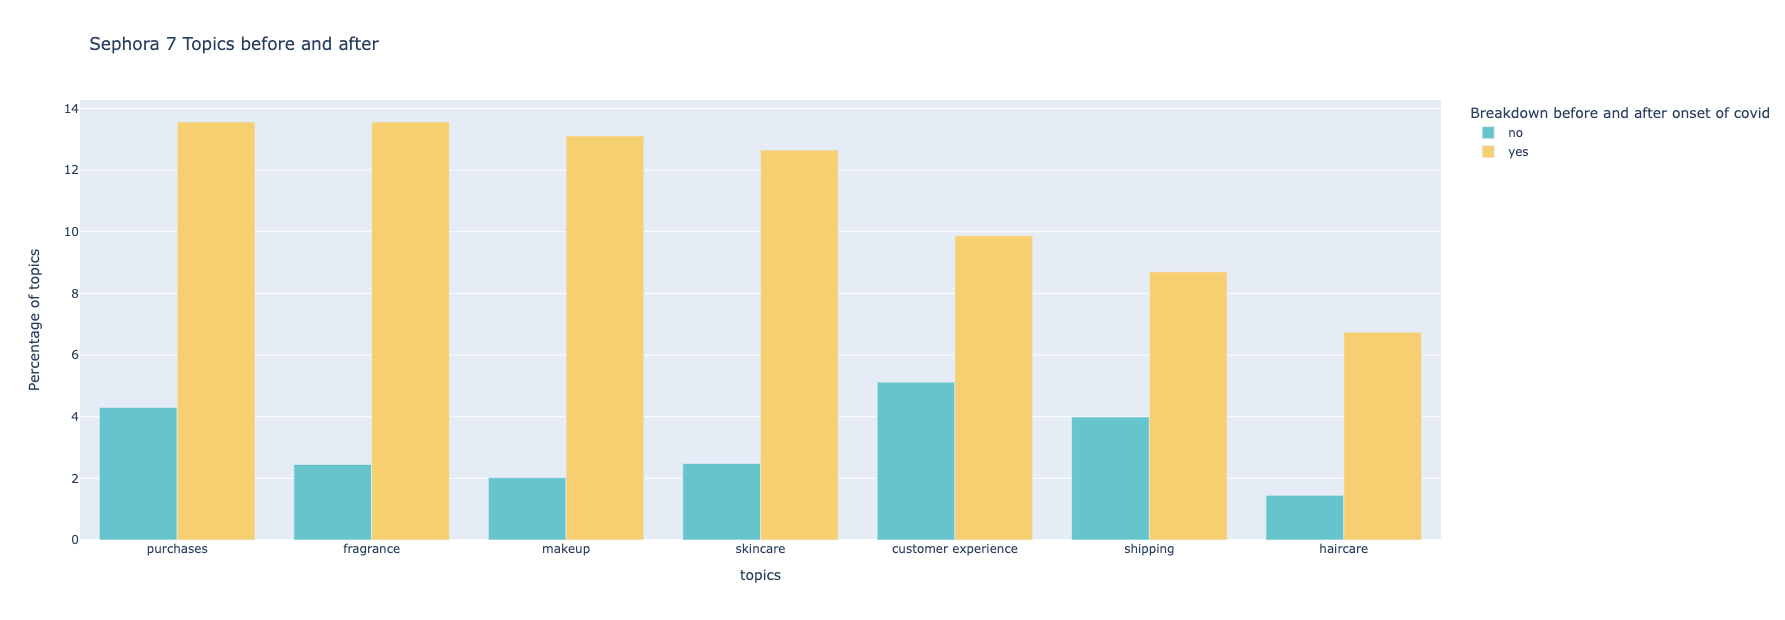

In [103]:
fig_1 = px.bar(df, x='topics', y='percentage', color='covid_onset',barmode="group",
               color_discrete_sequence=px.colors.qualitative.Pastel,
               labels=dict(covid_onset="Breakdown before and after onset of covid", percentage="Percentage of topics"), 
               category_orders={'topics':['purchases', 'fragrance', 'makeup', 'skincare','customer experience',  'shipping', 'haircare'], "covid_onset": ["no", "yes"]}, 
               title="Sephora 7 Topics before and after")

fig_1.update_layout(autosize = False, width=1200, height=620).update_yaxes(automargin=True)
fig_1.show()

In [24]:
# I was intending to manually label 50-100 data points with the earlier topics generated to see how well the model has performed. 
# # Decided not to, instead to name the top 10 topics and use zero shot
# df = sep.sample(100)
# df['human_labelling'] = ""
# df['human_labelling'][0] = 'test'